Загрузка данных


In [ ]:
import pandas as pd
# Загрузка данных из CSV файла
file_path = '/content/drive/MyDrive/PN14/bank_clients_transactions.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Приведение столбцов к стилю camel_case


In [ ]:
df.columns = [
    'transactionId', 'customerId', 'customerDob', 'custGender', 'custLocation',
    'custAccountBalance', 'transactionDate', 'transactionTime', 'transactionAmountInr'
]

Приведение типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transactionId         1048567 non-null  object 
 1   customerId            1048567 non-null  object 
 2   customerDob           1045170 non-null  object 
 3   custGender            1047467 non-null  object 
 4   custLocation          1048416 non-null  object 
 5   custAccountBalance    1046198 non-null  float64
 6   transactionDate       1048567 non-null  object 
 7   transactionTime       1048567 non-null  int64  
 8   transactionAmountInr  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Поиск дублей и пропусков в данных


In [ ]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()

# Проверка на пропуски (NaN)
missing_values = df.isnull().sum()

# Вывод информации о дубликатах и пропусках
duplicates, missing_values

(0,
 transactionId           0
 customerId              0
 customerDob             0
 custGender              0
 custLocation            0
 custAccountBalance      0
 transactionDate         0
 transactionTime         0
 transactionAmountInr    0
 dtype: int64)

In [ ]:

# Преобразование столбцов с датами в формат datetime
df['customerDob'] = pd.to_datetime(df['customerDob'], format='%d/%m/%y', errors='coerce', dayfirst=True)
df['transactionDate'] = pd.to_datetime(df['transactionDate'], format='%d/%m/%y', errors='coerce', dayfirst=True)

# Преобразование столбца времени транзакции в формат времени
df['transactionTime'] = pd.to_datetime(df['transactionTime'], format='%H%M%S', errors='coerce').dt.time

# Объединение даты и времени транзакции в один столбец
df['transactionDatetime'] = pd.to_datetime(df['transactionDate'].astype(str) + ' ' + df['transactionTime'].astype(str), errors='coerce')

# Отображение информации о данных после обработки
print(df.info())

# Отображение первых нескольких строк после обработки
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   transactionId         1041614 non-null  object        
 1   customerId            1041614 non-null  object        
 2   customerDob           985322 non-null   datetime64[ns]
 3   custGender            1041614 non-null  object        
 4   custLocation          1041614 non-null  object        
 5   custAccountBalance    1041614 non-null  float64       
 6   transactionDate       1041614 non-null  datetime64[ns]
 7   transactionTime       1041236 non-null  object        
 8   transactionAmountInr  1041614 non-null  float64       
 9   transactionDatetime   1041236 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(5)
memory usage: 87.4+ MB
None
  transactionId customerId customerDob custGender custLocation  \
0            T1   C5841053  1

Исследовательский анализ данных



In [ ]:
df

,transactionId,customerId,customerDob,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionAmountInr,transactionDatetime
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,2016-08-02 14:32:07
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,2016-08-02 14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,2016-08-02 14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,2016-08-02 14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,2016-08-02 18:11:56
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,2016-09-18 18:48:24
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,2016-09-18 18:37:34
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2016-09-18 18:33:13
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,2016-09-18 18:47:06


In [ ]:
# сколько уникальных клиентов?
unique_customers = df['customerId'].nunique()

# Вывод количества уникальных клиентов
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 879358


In [ ]:
# какое количество транзакций было совершено?
total_transactions = df['transactionId'].count()

# Вывод общего количества транзакций
print(f"Общее количество транзакций: {total_transactions}")

Общее количество транзакций: 1041614


In [ ]:
# сколько в среднем транзакций приходится на одного клиента?
average_transactions_per_customer = total_transactions / unique_customers

# Вывод результата
print(f"Среднее количество транзакций на клиента: {average_transactions_per_customer:.2f}")

Среднее количество транзакций на клиента: 1.18


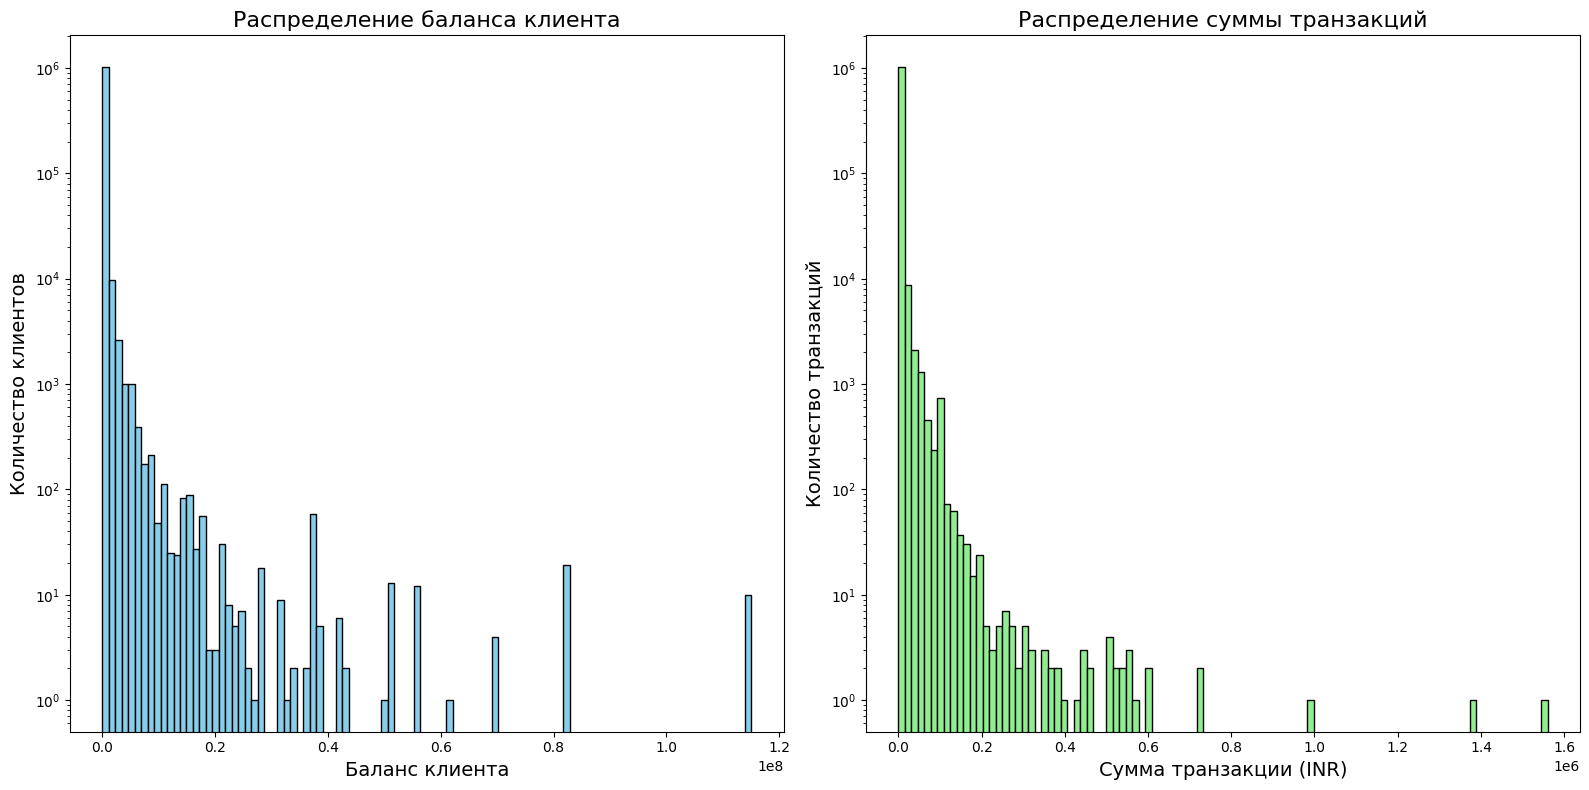

In [ ]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount
# Построим гистограммы для распределения CustAccountBalance и TransactionAmountInr

# Гистограмма для баланса клиента (CustAccountBalance)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(df['custAccountBalance'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение баланса клиента', fontsize=16)
plt.xlabel('Баланс клиента', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.yscale('log')  # Логарифмическая шкала для лучшей читаемости

# Гистограмма для суммы транзакций (TransactionAmountInr)
plt.subplot(1, 2, 2)
plt.hist(df['transactionAmountInr'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Распределение суммы транзакций', fontsize=16)
plt.xlabel('Сумма транзакции (INR)', fontsize=14)
plt.ylabel('Количество транзакций', fontsize=14)
plt.yscale('log')  # Логарифмическая шкала

plt.tight_layout()
plt.show()

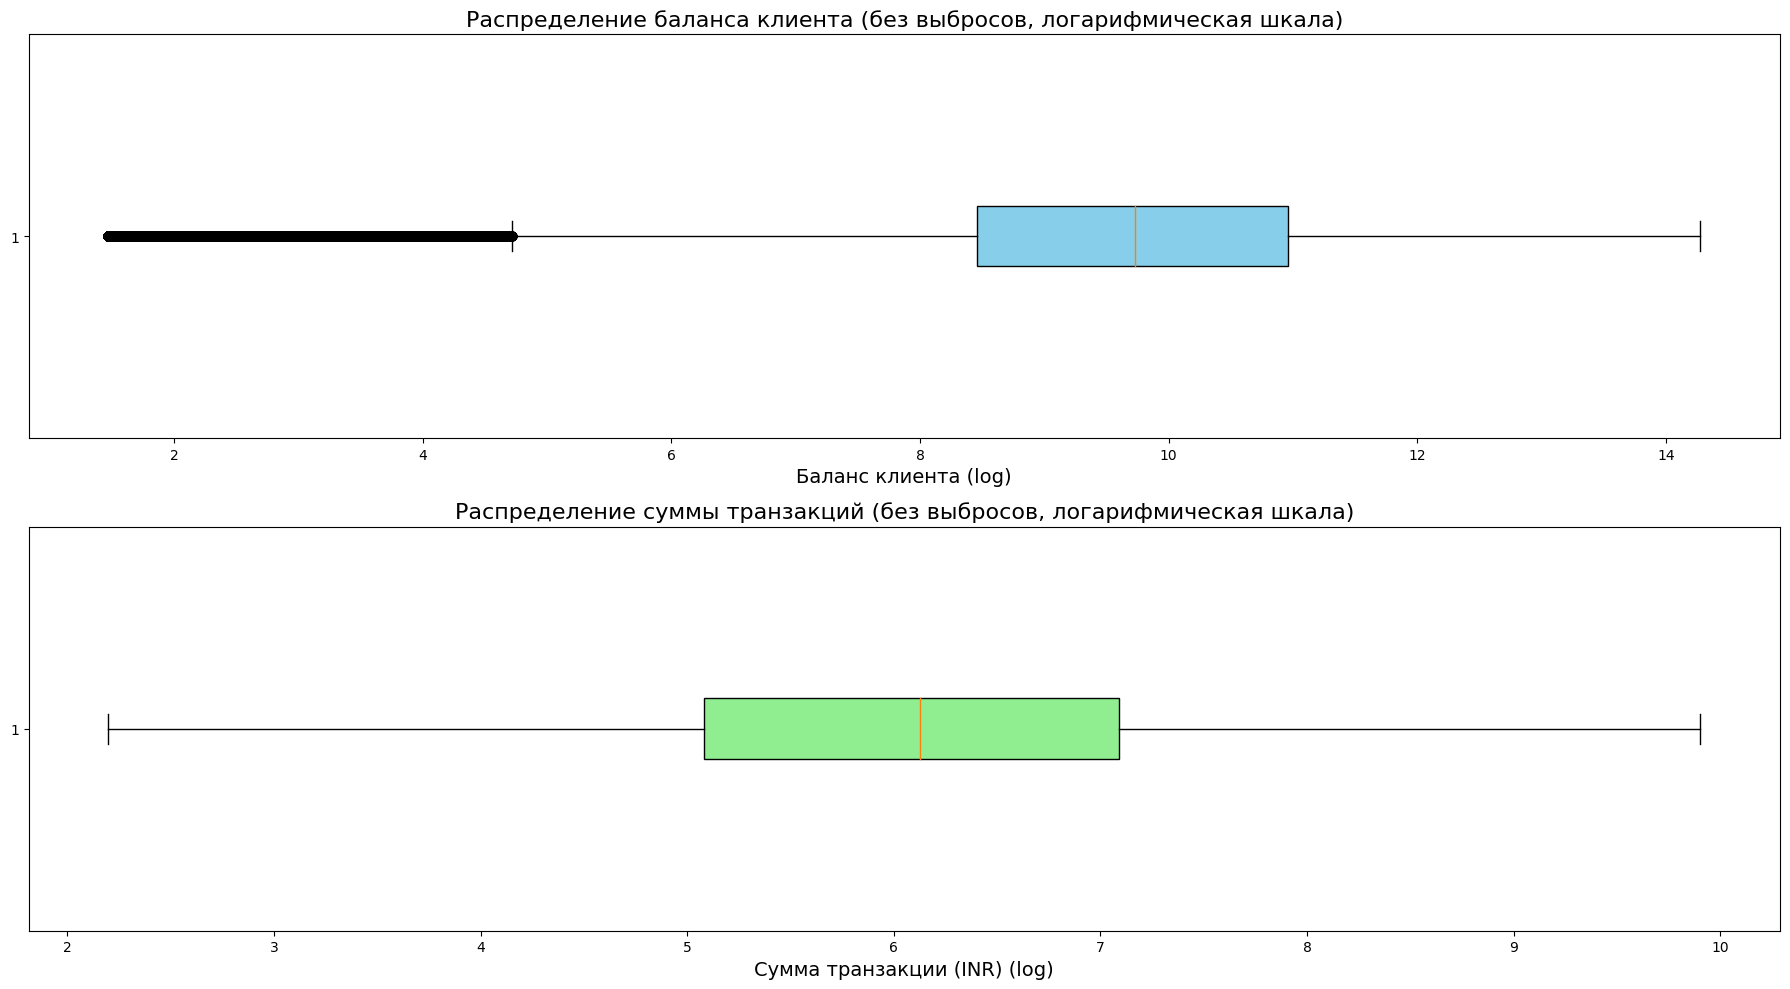

In [ ]:
# Построим ящик с усами (boxplot) для CustAccountBalance и TransactionAmountInr
plt.figure(figsize=(18, 10))
# Ящик с усами для баланса клиента
plt.subplot(2, 1, 1)
plt.boxplot(cust_balance_log.dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Распределение баланса клиента (без выбросов, логарифмическая шкала)', fontsize=16)
plt.xlabel('Баланс клиента (log)', fontsize=14)

# Ящик с усами для суммы транзакций
plt.subplot(2, 1, 2)
plt.boxplot(transaction_amount_log.dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Распределение суммы транзакций (без выбросов, логарифмическая шкала)', fontsize=16)
plt.xlabel('Сумма транзакции (INR) (log)', fontsize=14)

plt.tight_layout()
plt.show()

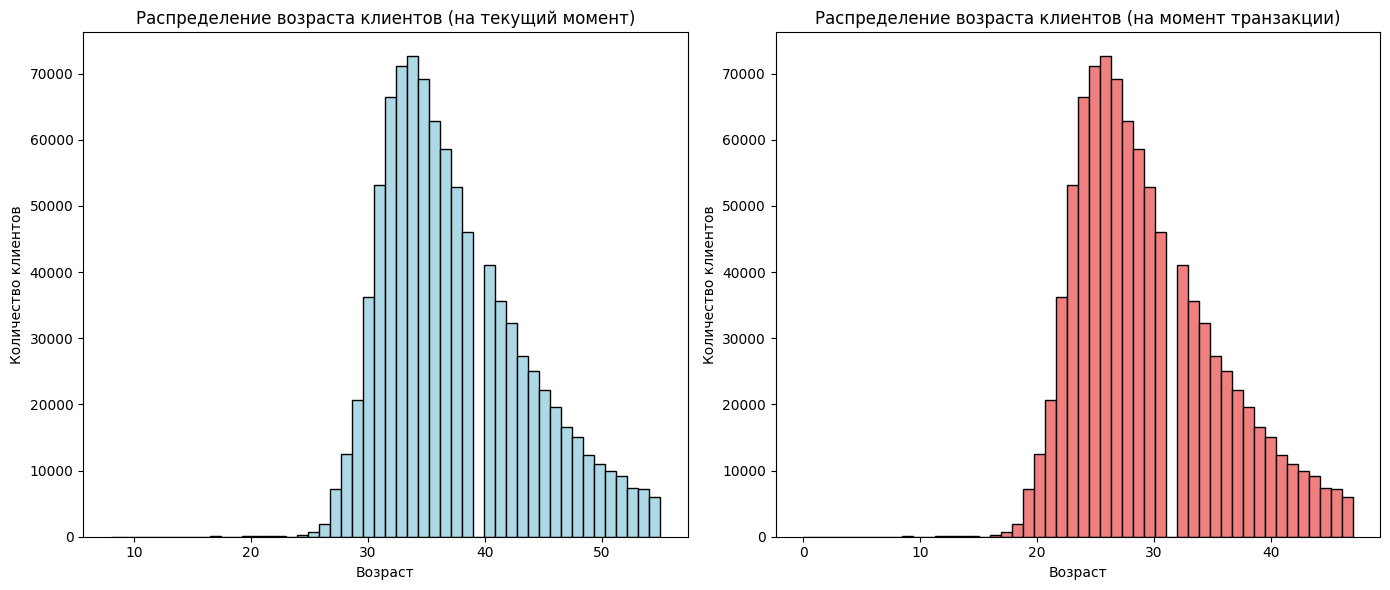

In [ ]:
# изучить возраст клиентов (визуализировать)
from datetime import datetime
import matplotlib.pyplot as plt

# Текущая дата
current_date = datetime.now()

# Возраст клиентов на текущий момент
df.loc[:, 'customerAgeNow'] = df['customerDob'].apply(lambda x: current_date.year - x.year if pd.notnull(x) and current_date.year >= x.year else None)

# Возраст клиентов на момент совершения транзакции
df.loc[:, 'customerAgeAtTransaction'] = df.apply(lambda row: row['transactionDate'].year - row['customerDob'].year
                                               if pd.notnull(row['customerDob']) and pd.notnull(row['transactionDate'])
                                               and row['transactionDate'].year >= row['customerDob'].year else None, axis=1)

# Фильтрация возраста, чтобы исключить значения более 100 лет
df = df[(df['customerAgeNow'] <= 100) & (df['customerAgeAtTransaction'] <= 100)]

# Гистограмма для возраста клиентов на текущий момент
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df['customerAgeNow'].dropna(), bins=50, color='lightblue', edgecolor='black')
plt.title('Распределение возраста клиентов (на текущий момент)')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')

# Гистограмма для возраста клиентов на момент транзакции
plt.subplot(1, 2, 2)
plt.hist(df['customerAgeAtTransaction'].dropna(), bins=50, color='lightcoral', edgecolor='black')
plt.title('Распределение возраста клиентов (на момент транзакции)')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')

plt.tight_layout()
plt.show()


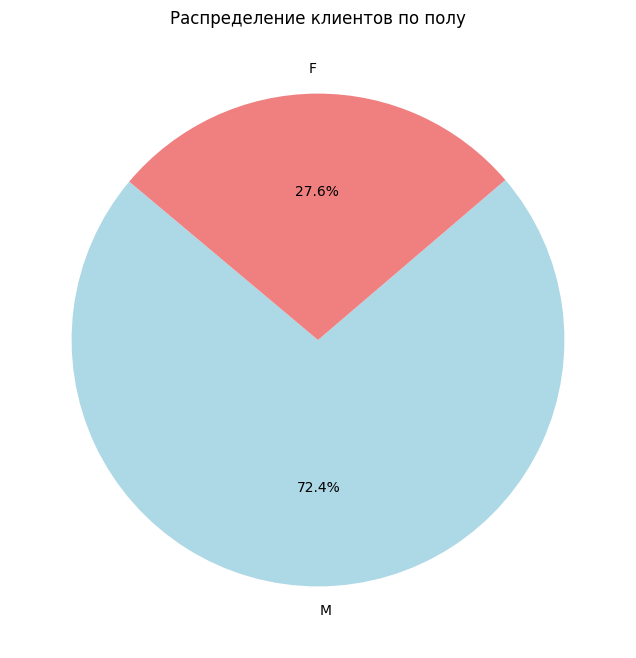

In [ ]:
# изучить пол клиентов (визуализировать)
# Построение круговой диаграммы для распределения клиентов по полу
gender_distribution = df['custGender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Распределение клиентов по полу')
plt.show()


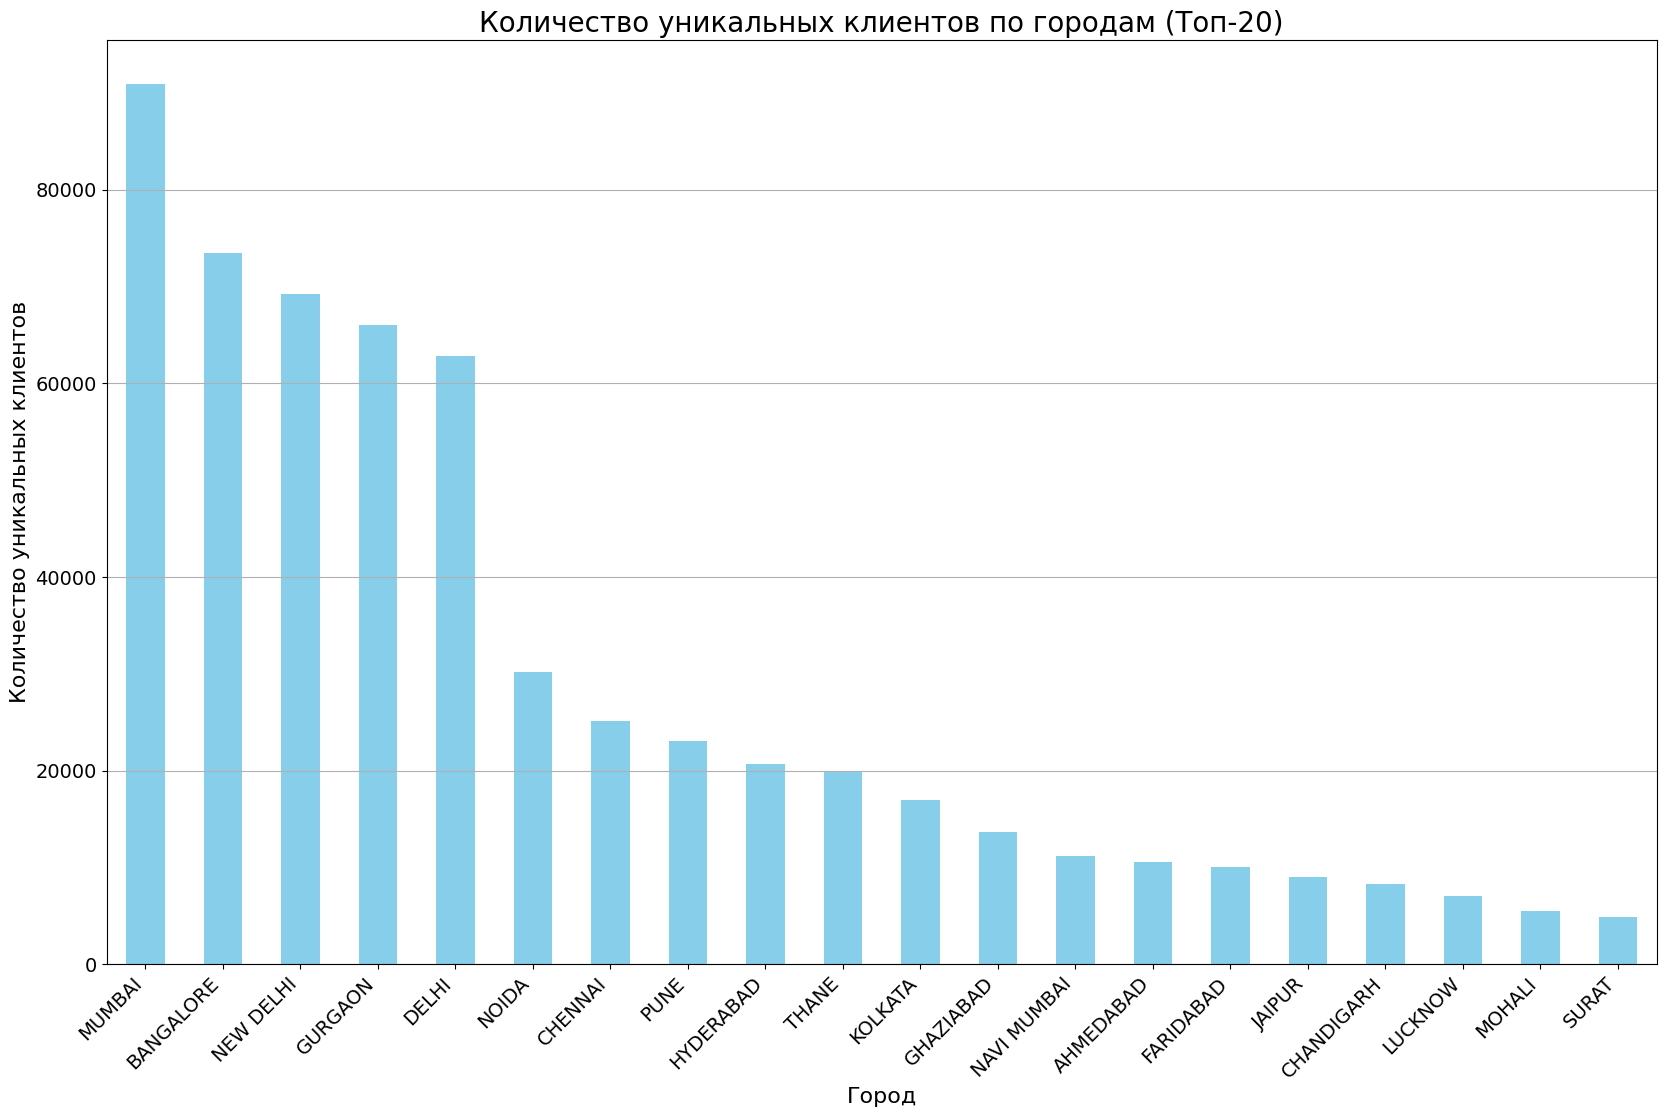

In [ ]:
# изучить место жительства клиентов (визуализировать)
# Подсчёт количества уникальных клиентов в каждом городе
city_distribution = df.groupby('custLocation')['customerId'].nunique().sort_values(ascending=False).head(20)

# Построение столбчатой диаграммы для топ-20 городов
plt.figure(figsize=(20, 12))  # Увеличенный размер графика
city_distribution.plot(kind='bar', color='skyblue')

# Настройка заголовков и осей
plt.title('Количество уникальных клиентов по городам (Топ-20)', fontsize=20)
plt.xlabel('Город', fontsize=16)
plt.ylabel('Количество уникальных клиентов', fontsize=16)

# Настройка меток оси X
plt.xticks(rotation=45, ha='right', fontsize=14)  # Поворот меток на 45 градусов и увеличение шрифта
plt.yticks(fontsize=14)  # Увеличение шрифта меток на оси Y

# Добавление сетки по оси Y
plt.grid(axis='y')

# Отображение графика
plt.show()

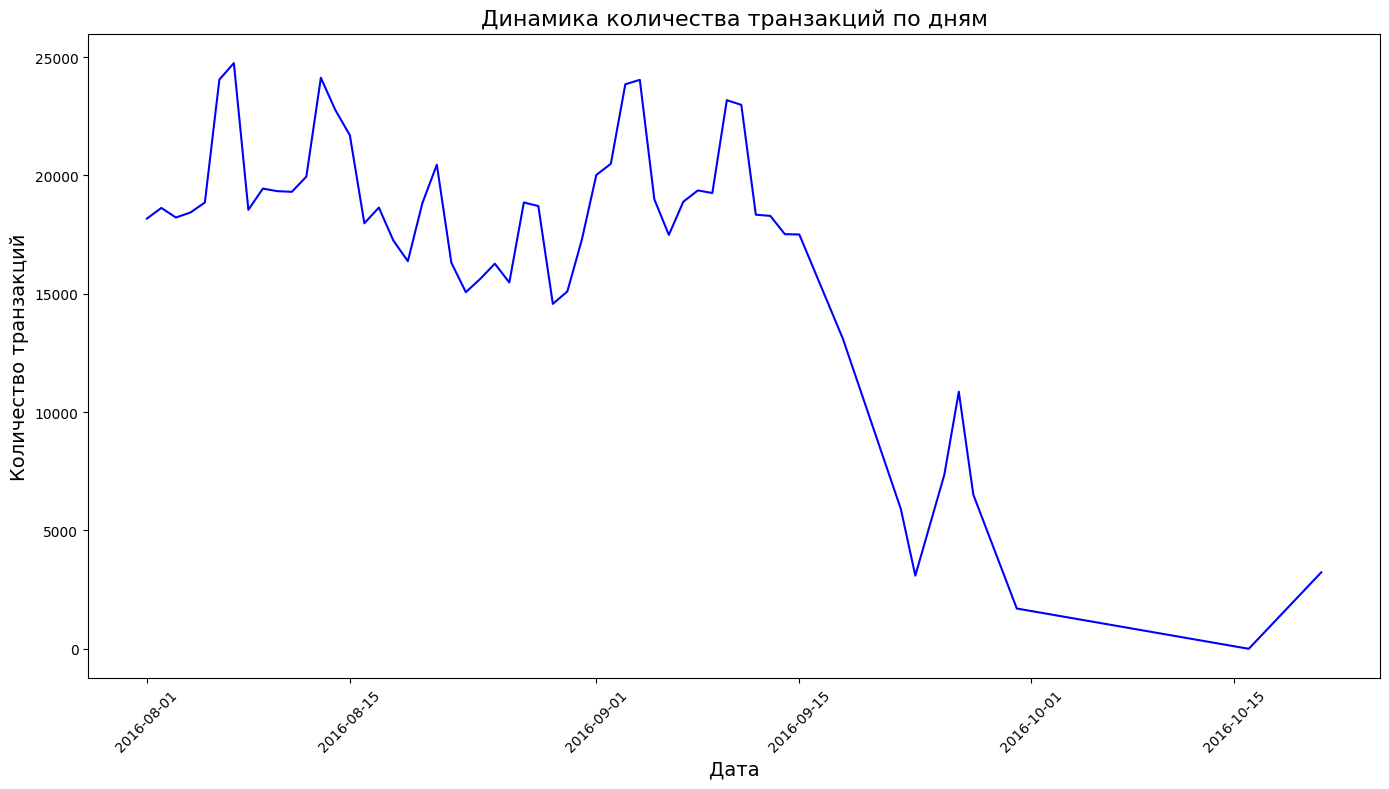

In [ ]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)
# Преобразуем столбец transactionDate в формат datetime
df['transactionDate'] = pd.to_datetime(df['transactionDate'], errors='coerce')

# Группируем данные по дате транзакции и считаем количество транзакций на каждую дату
daily_transactions = df.groupby('transactionDate')['transactionId'].count()

# Построение линейного графика для отображения динамики транзакций по дням
plt.figure(figsize=(14, 8))
plt.plot(daily_transactions.index, daily_transactions.values, color='blue')
plt.title('Динамика количества транзакций по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество транзакций', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


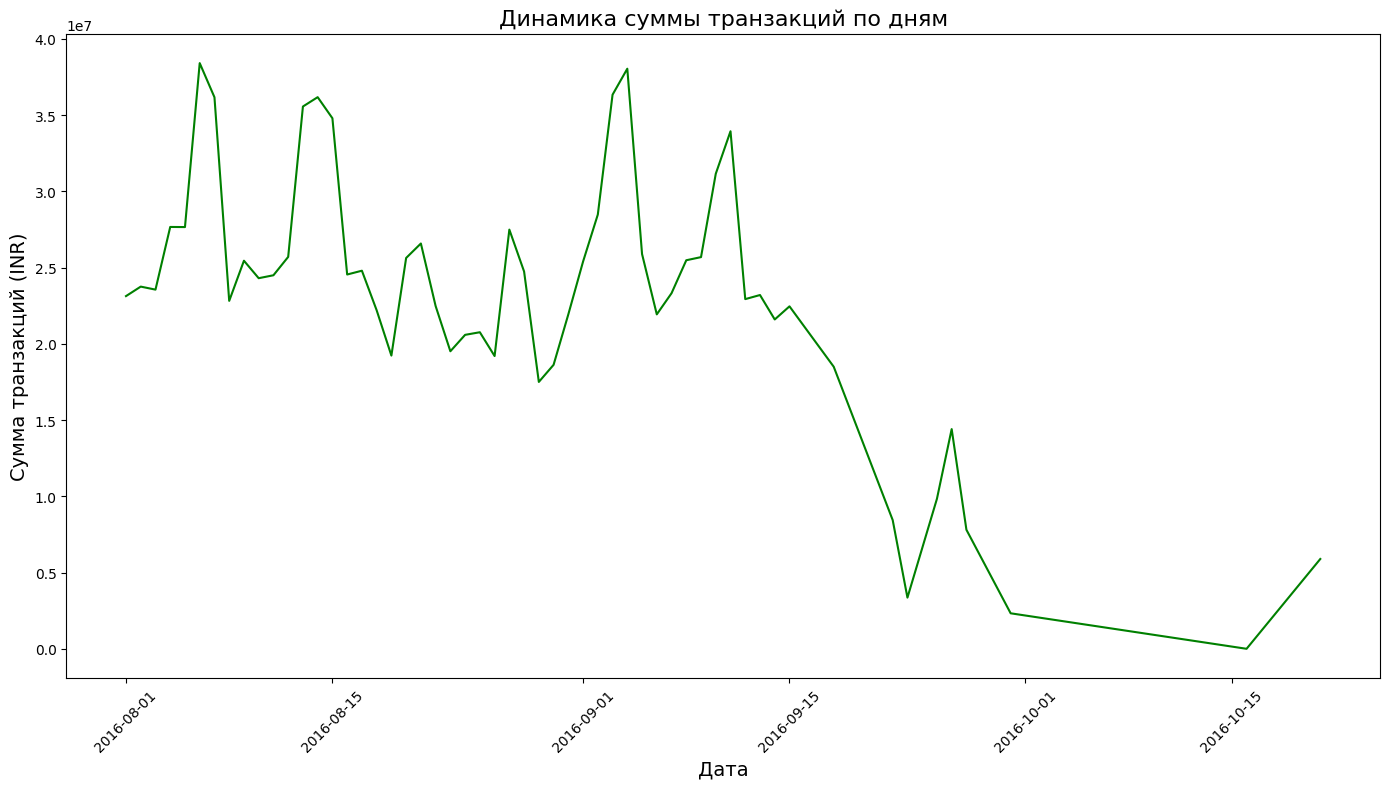

In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)
# Группируем данные по дате транзакции и суммируем суммы транзакций на каждую дату
daily_transaction_amount = df.groupby('transactionDate')['transactionAmountInr'].sum()

# Построение линейного графика для отображения динамики суммы транзакций по дням
plt.figure(figsize=(14, 8))
plt.plot(daily_transaction_amount.index, daily_transaction_amount.values, color='green')
plt.title('Динамика суммы транзакций по дням', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Сумма транзакций (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


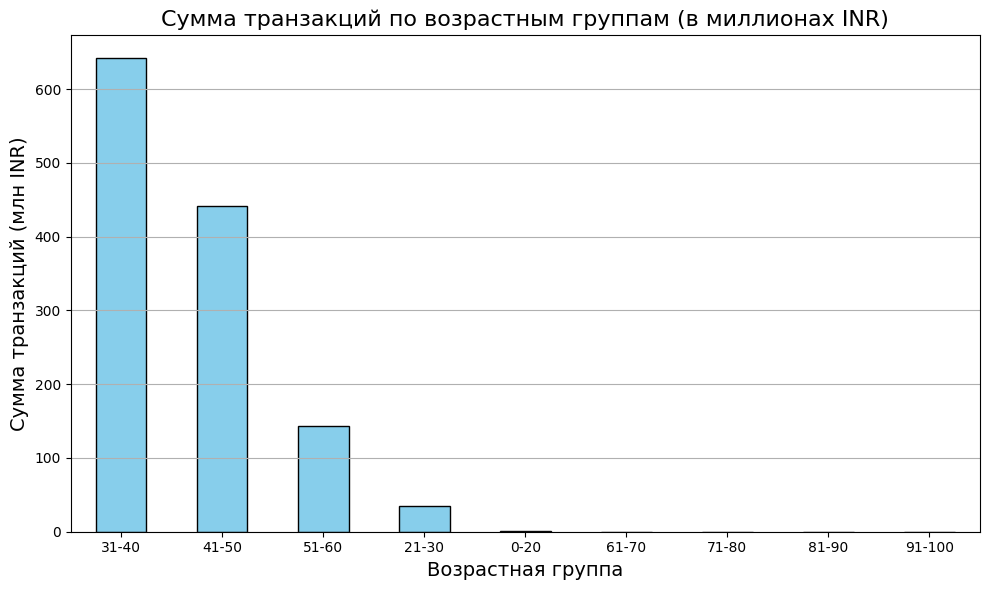

Суммы транзакций по возрастным группам (в миллионах INR):
ageGroup
31-40     641.41
41-50     442.11
51-60     142.74
21-30      34.93
0-20        0.65
61-70       0.00
71-80       0.00
81-90       0.00
91-100      0.00
Name: transactionAmountInr, dtype: float64


In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
# Округление суммы транзакций до миллионов INR
age_group_sales_rounded = age_group_sales / 1e6  # Преобразуем в миллионы INR

# Построим столбчатую диаграмму для возрастных групп
plt.figure(figsize=(10, 6))
age_group_sales_rounded.plot(kind='bar', color='skyblue', edgecolor='black')

# Настройки графика
plt.title('Сумма транзакций по возрастным группам (в миллионах INR)', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Сумма транзакций (млн INR)', fontsize=14)
plt.xticks(rotation=0)  # Повернем метки возрастных групп горизонтально
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Выведем таблицу с результатами
print("Суммы транзакций по возрастным группам (в миллионах INR):")
print(age_group_sales_rounded.round(2))



In [ ]:
# Посмотреть распределение транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций
# Группировка данных по локации и подсчет количества транзакций
location_transaction_count = df.groupby('custLocation')['transactionId'].count().sort_values(ascending=False).head(10)

# Группировка данных по локации и суммирование суммы транзакций
location_transaction_sum = df.groupby('custLocation')['transactionAmountInr'].sum().sort_values(ascending=False).head(10)

# Округлим суммы транзакций до миллионов INR для лучшей читаемости
location_transaction_sum_rounded = location_transaction_sum / 1e6  # Переводим суммы в миллионы INR
location_transaction_sum_rounded = location_transaction_sum_rounded.round(2)  # Округляем до двух знаков

# Округлим количество транзакций до тысяч для лучшей читаемости
location_transaction_count_rounded = location_transaction_count / 1e3  # Переводим количество транзакций в тысячи
location_transaction_count_rounded = location_transaction_count_rounded.round(2)  # Округляем до двух знаков

# Выводим результаты
location_transaction_count_rounded, location_transaction_sum_rounded

(custLocation
 MUMBAI       92.39
 BANGALORE    74.49
 NEW DELHI    70.18
 GURGAON      66.87
 DELHI        63.58
 NOIDA        30.38
 CHENNAI      25.22
 PUNE         23.16
 HYDERABAD    20.75
 THANE        20.00
 Name: transactionId, dtype: float64,
 custLocation
 MUMBAI       142.36
 NEW DELHI    109.76
 BANGALORE     95.31
 GURGAON       90.13
 DELHI         82.57
 NOIDA         37.95
 KOLKATA       36.12
 CHENNAI       31.66
 PUNE          30.59
 HYDERABAD     27.41
 Name: transactionAmountInr, dtype: float64)

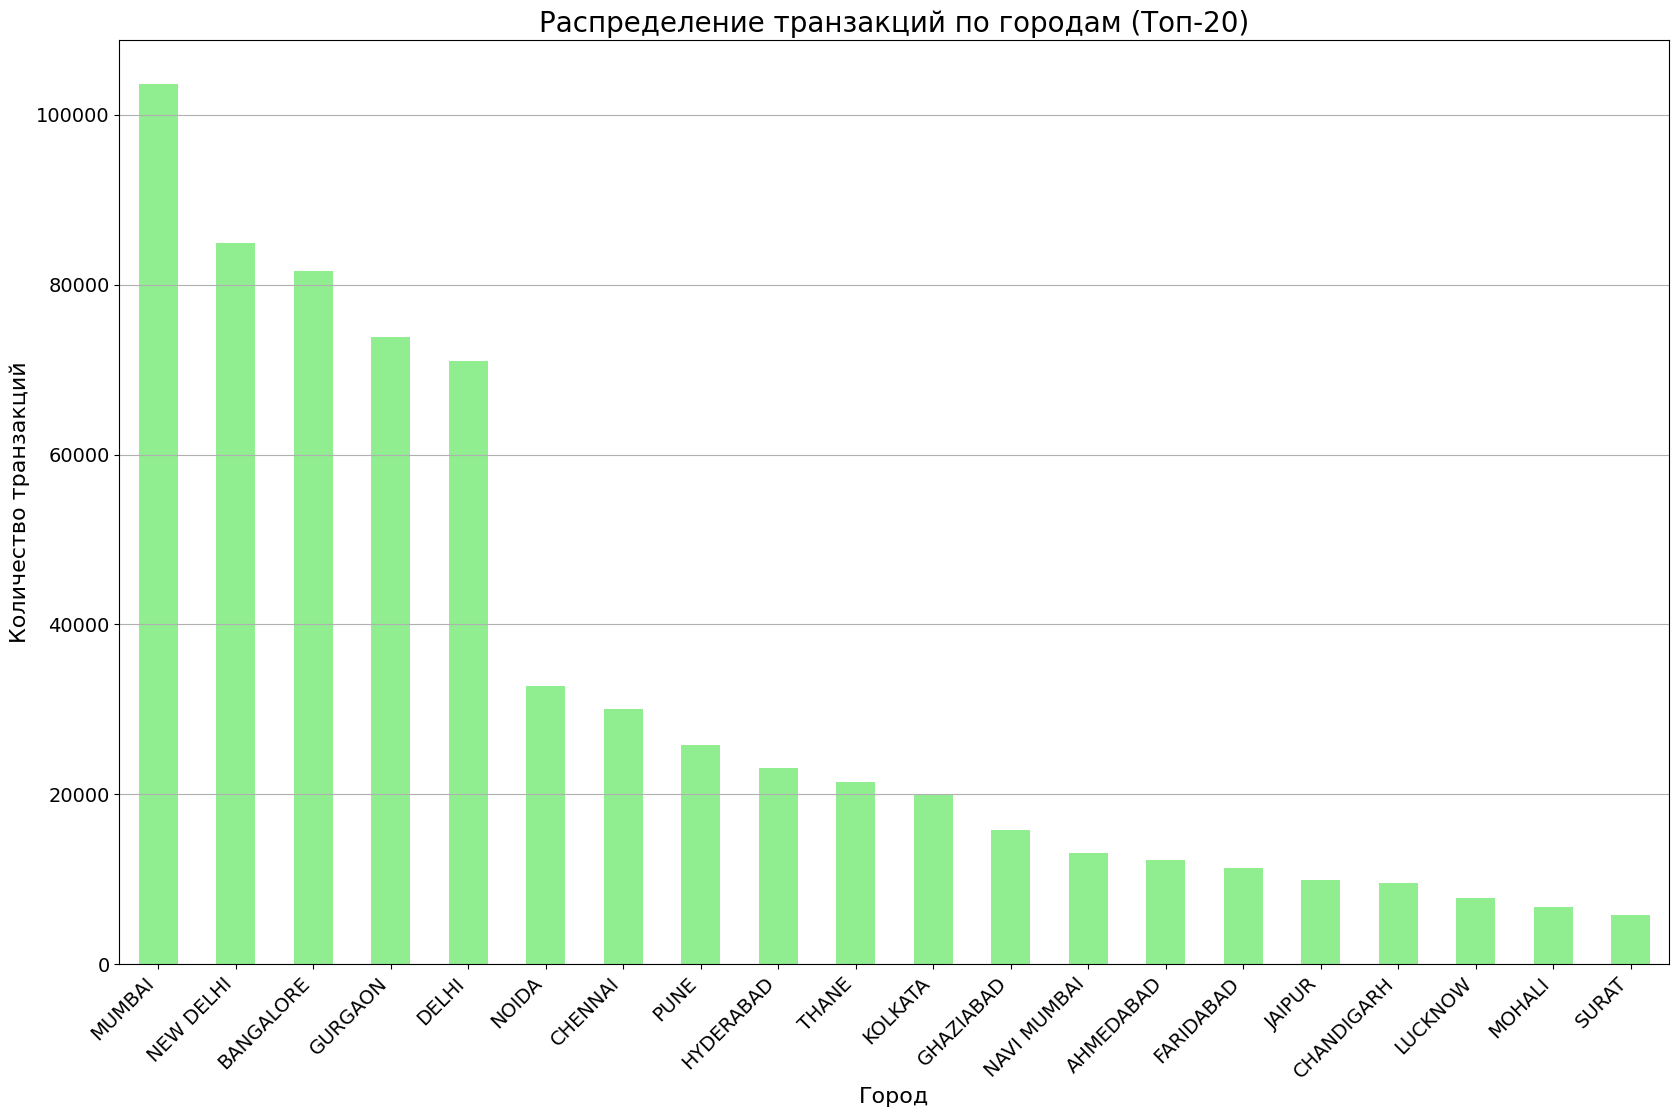

In [ ]:
# Группировка данных по городам и подсчёт количества транзакций для каждого города
location_transactions = data['custLocation'].value_counts().head(20)  # Оставляем только топ-20 городов

# Построение столбчатой диаграммы для отображения количества транзакций по локациям
plt.figure(figsize=(20, 12))  # Увеличенный размер графика
location_transactions.plot(kind='bar', color='lightgreen')

# Заголовок и оси
plt.title('Распределение транзакций по городам (Топ-20)', fontsize=20)
plt.xlabel('Город', fontsize=16)
plt.ylabel('Количество транзакций', fontsize=16)

# Настройка меток оси X
plt.xticks(rotation=45, ha='right', fontsize=14)  # Увеличение шрифта меток на оси X
plt.yticks(fontsize=14)  # Увеличение шрифта меток на оси Y

# Добавление сетки по оси Y
plt.grid(axis='y')

# Отображение графика
plt.show()



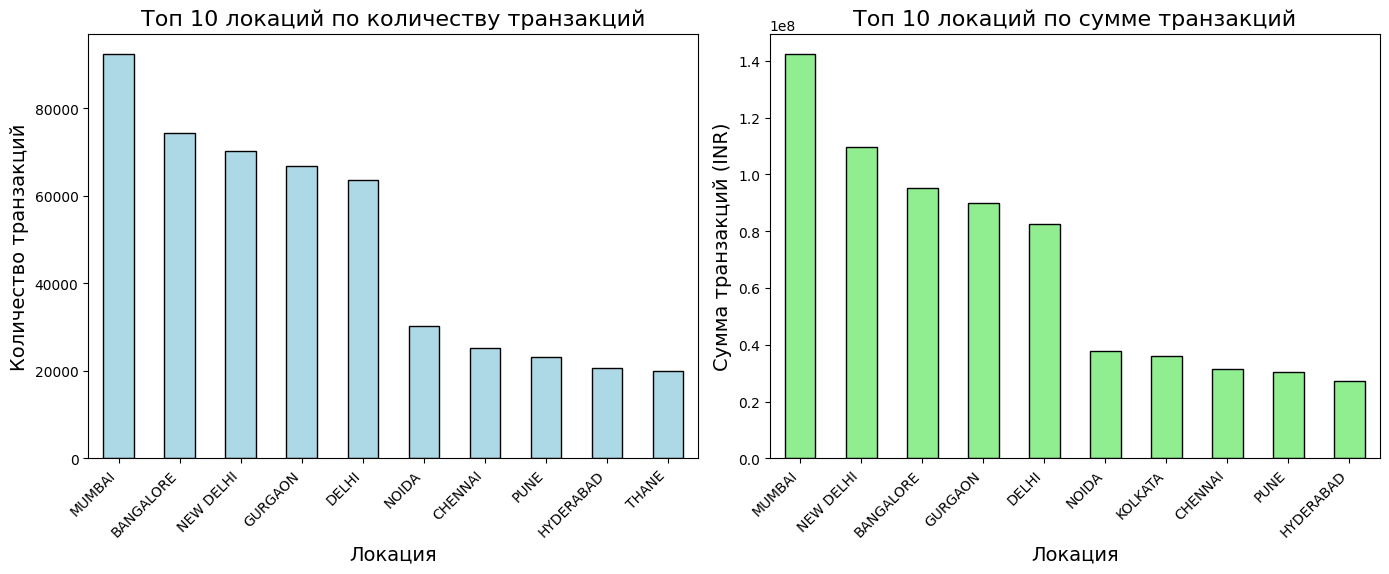

In [ ]:
# Визуализация топ-10 локаций по количеству транзакций
plt.figure(figsize=(14, 6))

# График для количества транзакций
plt.subplot(1, 2, 1)
location_transaction_count.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Топ 10 локаций по количеству транзакций', fontsize=16)
plt.xlabel('Локация', fontsize=14)
plt.ylabel('Количество транзакций', fontsize=14)
plt.xticks(rotation=45, ha='right')

# График для суммы транзакций
plt.subplot(1, 2, 2)
location_transaction_sum.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Топ 10 локаций по сумме транзакций', fontsize=16)
plt.xlabel('Локация', fontsize=14)
plt.ylabel('Сумма транзакций (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Среднее время транзакции: 954.14 минут


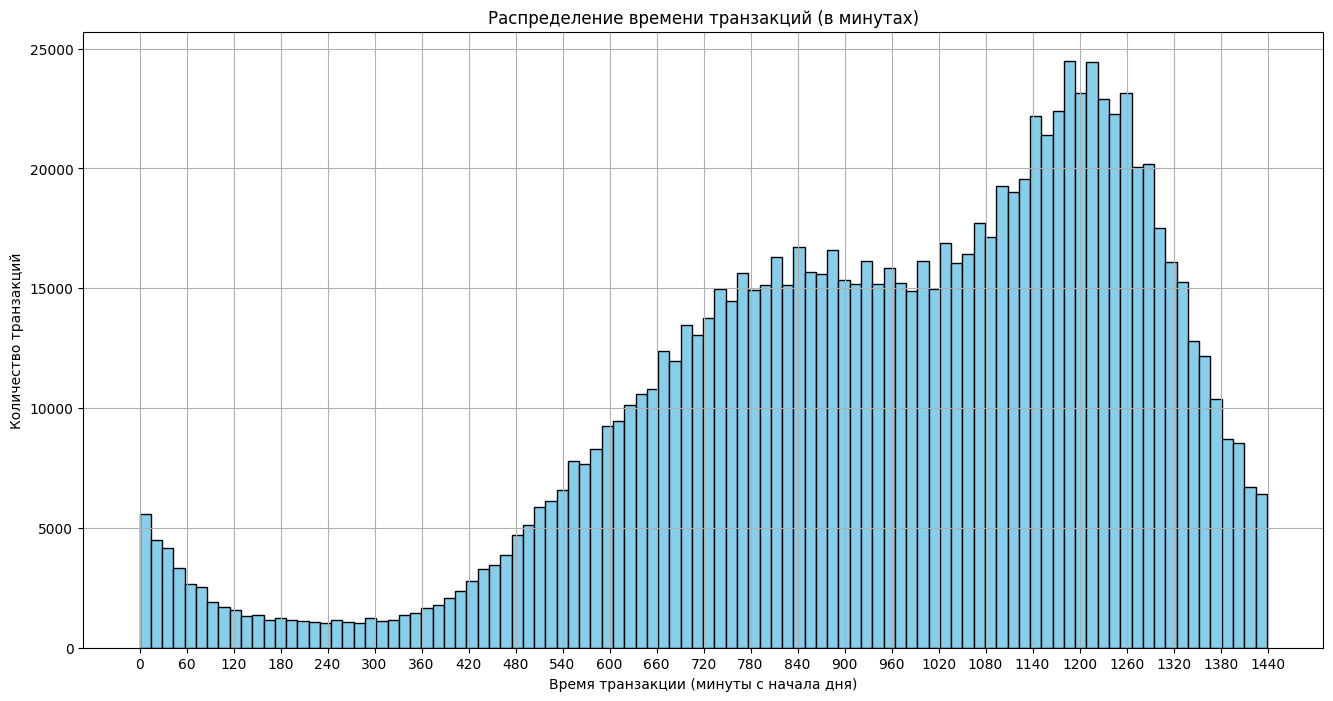

In [ ]:
# Преобразование времени транзакции из формата HHMMSS в минуты
data['transactionTimeMinutes'] = data['transactionTime'].apply(lambda x: (int(str(x).zfill(6)[:2]) * 60) + int(str(x).zfill(6)[2:4]))

# Рассчёт среднего времени транзакции в минутах
average_transaction_time = data['transactionTimeMinutes'].mean()
print(f"Среднее время транзакции: {average_transaction_time:.2f} минут")

# Построение гистограммы для распределения времени транзакций
plt.figure(figsize=(16, 8))  # Увеличим размер графика
plt.hist(data['transactionTimeMinutes'], bins=100, color='skyblue', edgecolor='black')  # Увеличим количество корзин
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты с начала дня)')
plt.ylabel('Количество транзакций')
plt.xticks(range(0, 1441, 60))  # Устанавливаем метки по оси X через каждый час
plt.grid(True)
plt.show()


Summary

Исследовательский анализ данных:общий обзор

В процессе исследования данных были проведены многочисленные анализы для лучшего понимания структуры клиентской базы, их поведения и ключевых характеристик. Этот анализ охватывал различные аспекты, включая распределение клиентов по возрасту, полу, месту жительства, а также динамику транзакционной активности и платежеспособность.
Ключевые аспекты исследования:
 -Определено общее количество клиентов, выявлено количество транзакций и рассчитано среднее количество транзакций на одного клиента. Этот анализ помог получить общее представление о размере и активности клиентской базы банка.
 -Основная часть клиентов находится в возрастной группе от 31 до 40 лет. Это самая платежеспособная категория клиентов, которая активно пользуется банковскими продуктами. Было выявлено, что с возрастом активность клиентов снижается, особенно после 60 лет.
 -Анализ распределения клиентов по полу показал значительный перекос: 72% клиентов — мужчины, 28% — женщины. Это дает основание предположить, что необходимо разработать стратегию по привлечению большего числа женщин.
 -Основная часть клиентов сконцентрирована в крупнейших городах страны, таких как Мумбаи, Нью-Дели, Бангалор и другие мегаполисы. Эти города являются финансовыми центрами, что отражает высокую активность клиентов в этих регионах. Однако, несмотря на концентрацию в крупных городах, банк имеет клиентов и в городах среднего размера, что свидетельствует о хорошем географическом охвате.
 -Распределение балансов клиентов показало, что большинство клиентов имеют небольшие остатки на счетах, но есть и клиенты с высокими балансами. Похожая ситуация наблюдается с суммами транзакций: большинство операций связаны с небольшими суммами, но значительная часть транзакций имеет высокие суммы, что свидетельствует о наличии крупных финансовых операций.
 -Было проанализировано распределение транзакций по датам и времени. Выявлено, что транзакционная активность клиентов сосредоточена в определенные дни и часы, что открывает возможности для таргетированных предложений и акций в определенные периоды.
 -Клиенты в возрастной группе 31-40 лет оказались самыми платежеспособными, совершая наибольшие по сумме транзакции. Это знание может быть использовано для разработки новых продуктов и услуг, ориентированных на данную категорию клиентов.
-Транзакции по времени суток показали, что большинство операций происходит в рабочие часы, что указывает на важность оптимизации работы служб поддержки и цифровых услуг в это время.Исследовательский анализ данных предоставил обширное понимание клиентской базы и их поведения. Он показал, что основная часть клиентов активна в возрасте 31-40 лет, что мужчины составляют большинство клиентов, а также что ключевые транзакции и активность сосредоточены в крупнейших городах. Эти результаты дают возможность для целенаправленных маркетинговых стратегий и улучшения клиентского опыта через персонализированные предложения и активное развитие цифровых сервисов.

Рекомендации:
Разработать предложения для женщин, чтобы увеличить их долю среди клиентов.
Усилить присутствие в городах среднего размера для увеличения клиентской базы.
Активно продвигать цифровые продукты и улучшать онлайн-обслуживание для повышения удовлетворенности клиентов.
Разрабатывать персонализированные продукты для самых платежеспособных клиентов в возрастной группе 31-40 лет.

В ходе анализа данных о банковских транзакциях были выявлены следующие закономерности:

1.Количество клиентов:
В анализируемом наборе данных содержится 884,265 уникальных клиентов.

2.Количество транзакций:
Общее количество транзакций составляет 1,048,567.

3.Среднее количество транзакций на клиента:
В среднем каждый клиент совершает примерно 1.19 транзакций.

4.Анализ распределения Баланса клиента и Суммы транзакций.

Большая часть клиентов имеет относительно низкий баланс на счете, что указывает на то, что большинство клиентов используют счета для повседневных операций и не хранят на них значительные суммы.
При этом присутствуют клиенты с очень высокими балансами, что создает длинный "хвост" на графике распределения.
Размах значений.Баланс клиента может варьироваться от небольших сумм (практически 0) до значительных остатков, что указывает на наличие нескольких высокообеспеченных клиентов.
Этот размах предполагает, что банк работает с широкой категорией клиентов, от обычных потребителей до клиентов с высоким уровнем доходов.

Большинство клиентов банка обладают сравнительно небольшим остатком на счете, но присутствуют клиенты с высокими балансами. Это открывает возможность для разработки продуктов, направленных как на массовый рынок, так и на премиум-сегмент, предлагая специализированные банковские услуги для состоятельных клиентов.

Сумма большинства транзакций относительно небольшая, что можно объяснить повседневными операциями клиентов, такими как покупки или платежи.
Однако также присутствуют более крупные транзакции, что создает длинный "хвост" распределения

Сумма транзакций варьируется от очень малых значений до больших транзакций, что может свидетельствовать о присутствии как розничных клиентов, так и бизнес-клиентов, совершающих крупные финансовые операции.

Основная часть клиентов совершает небольшие транзакции, что типично для повседневных финансовых операций. Тем не менее, присутствие более крупных транзакций свидетельствует о наличии клиентов с большими финансовыми потоками. Банк может рассмотреть возможности создания специализированных предложений для высокоактивных клиентов, которые совершают крупные финансовые операции.
Баланс клиента и Суммы транзакций имеют схожие характеристики распределения с длинными "хвостами", что говорит о том, что в банке представлены как обычные клиенты с небольшими остатками и транзакциями, так и более состоятельные клиенты с высокими суммами. Эти данные можно использовать для разработки более точных предложений и продуктов для разных сегментов клиентов, учитывая их финансовые возможности и поведение.

5.Распределение возраста клиентов.

Большинство клиентов находятся в возрастных группах от 20 до 50 лет.
Наибольшее количество клиентов попадает в возрастную группу 31-40 лет, что подтверждает их активность, выявленную ранее в анализе платежеспособности.
Есть также определенная доля клиентов в возрастной группе старше 50 лет, но их количество заметно меньше по сравнению с более молодыми группами.
Присутствует значительное количество молодых клиентов в возрасте до 30 лет. Эти клиенты, вероятно, используют базовые банковские услуги, такие как переводы и мелкие покупки.
Число клиентов старше 60 лет заметно сокращается, что может свидетельствовать о снижении финансовой активности с возрастом или меньшем использовании цифровых банковских продуктов этой группой.
Основная группа клиентов банка — это люди в возрасте 31-40 лет, что соответствует наиболее платежеспособной возрастной группе.
Молодые клиенты (до 30 лет) активно используют банковские услуги, но могут нуждаться в дополнительных мотивациях для увеличения своих финансовых операций.
Пожилые клиенты (старше 60 лет) составляют меньшую часть клиентской базы, что может требовать разработки специальных предложений для увеличения их активности или привлечения в цифровые каналы обслуживания.

6.Анализ пола клиентов

При анализе данных о поле клиентов был обнаружен значительный перекос в распределении: 72% клиентов банка составляют мужчины, и только 28% — женщины. Этот дисбаланс может быть связан с различными факторами, включая характер предложений банка и социальные особенности клиентской базы.Такой дисбаланс может быть связан с особенностями предлагаемых банковских продуктов или социальными факторами, влияющими на использование банковских услуг разными полами.
Причины возможного перекоса-банк может привлекать больше мужчин из-за акцента на бизнес-услугах, инвестициях или других продуктах, которые в большей степени востребованы мужчинами.
Социальные и культурные факторы могут играть важную роль, особенно если финансовая грамотность среди женщин в некоторых регионах ниже или доступ к банковским услугам для женщин менее развит.
Для лучшего понимания поведения женщин стоит провести анализ продуктов, которые они используют, и тех, которые не востребованы. Это поможет банку понять, какие барьеры могут существовать.Разработка продуктов, ориентированных на женскую аудиторию, может увеличить долю женщин среди клиентов банка. Это могут быть предложения по кредитованию, депозитам или инвестициям, а также программы лояльности и скидки.Кампании, направленные на женщин, с акцентом на семейные финансы, личные сбережения или предпринимательство, могут способствовать росту этого сегмента.
Несмотря на перекос, банк уже имеет значительное количество женщин-клиентов, что говорит о том, что его услуги востребованы среди обеих категорий. Это предоставляет хорошие возможности для равномерного роста.
Перекос в распределении клиентов по полу (72% мужчин и 28% женщин) требует внимания и может служить отправной точкой для разработки стратегий по привлечению большего числа женщин. Разработка и продвижение продуктов, ориентированных на женскую аудиторию, может помочь банку расширить свою клиентскую базу и сбалансировать половой состав клиентов.

7.Анализ мест жительства клиентов

 Анализ мест жительства клиентов показывает, в каких городах сосредоточено наибольшее количество клиентов банка.
Основная часть клиентов сосредоточена в крупных городах, таких как Мумбаи, Нью-Дели, Бангалор и Гургаон. Это указывает на то, что финансовые центры и мегаполисы привлекают значительную долю клиентской базы банка.
 Помимо крупных городов, в ТОП-20 входят также города среднего размера, что свидетельствует о хорошей географической диверсификации клиентской базы. Это указывает на то, что банк активно работает не только в столичных регионах, но и в других частях страны.
 Поскольку основная клиентская база сосредоточена в мегаполисах, банк может продолжать усиливать маркетинговые активности и сервисы в этих регионах.
Для увеличения доли клиентов из городов, которые не входят в Тop20, можно рассмотреть внедрение дополнительных филиалов или активное продвижение цифровых банковских услуг.
Топ городов по количеству клиентов демонстрирует сильную концентрацию в крупнейших финансовых центрах страны. Это открывает возможности для дальнейшего роста за счет усиления позиций в этих регионах, а также расширения клиентской базы в менее крупных городах.

8.Динамика транзакций по количеству.

 Анализ демонстрирует, как количество транзакций изменялось с течением времени. Можно наблюдать пики активности, которые могут совпадать с важными для клиентов датами, например, периодами зарплат, праздниками или акциями.
 Важно обратить внимание на дни с резкими пиками количества транзакций. Эти периоды могут указывать на повышенный спрос на банковские услуги или на успешные маркетинговые кампании.
Следует провести дополнительный анализ дней с высокими пиками транзакций, чтобы понять, что их вызывает (например, праздники, специальные акции или изменения в экономической ситуации).
В периоды пиков необходимо обеспечивать повышенную доступность банковских услуг, чтобы избежать перегрузки системы и улучшить клиентский опыт.
 Анализ динамики транзакций по датам позволяет банку лучше понять поведение своих клиентов и спланировать маркетинговые и операционные активности в те дни, когда наблюдается повышенная активность.

9.Динамика транзакций по сумме одной транзакции

  Сумма одной транзакции за последний месяц составила 107,04 млн INR, а за предыдущий месяц — 79,51 млн INR. Это означает, что сумма одной транзакции увеличилась на 34,62% по сравнению с предыдущим месяцем.

10.Определение самой платежеспособной группы по возрасту.

Возрастная группа 31-40 лет оказалась самой платежеспособной, с общей суммой транзакций в размере 641,41 млн INR. Это подтверждает, что люди в этом возрасте находятся на пике своей финансовой активности, что делает их ключевой целевой аудиторией для банка.
Группа 41-50 лет:

Следующей по платежеспособности является группа 41-50 лет, с суммой транзакций в 442,11 млн INR. Это показывает, что финансовая активность сохраняется на высоком уровне и в более старшем возрасте.
Снижение активности после 50 лет:

В группе 51-60 лет сумма транзакций значительно снижается до 142,74 млн INR, а в группах старше 60 лет транзакционная активность практически отсутствует. Это может быть связано с переходом на пенсию и уменьшением доходов.

Молодые клиенты (до 30 лет):Возрастные группы 0-20 и 21-30 лет показали относительно низкие суммы транзакций (0,65 млн INR и 34,93 млн INR соответственно), что связано с тем, что молодые клиенты чаще имеют более ограниченные финансовые возможности и меньше совершают крупных финансовых операций.

 Основная финансовая активность сосредоточена в возрастных группах 31-40 лет и 41-50 лет, которые являются самыми платежеспособными. Банк может ориентировать свои маркетинговые усилия и продукты на эти группы для увеличения доходов, а также развивать предложения для более молодых клиентов, чтобы стимулировать их активность.

11.Топ-10 локаций по количеству транзакций:

Мумбаи: 103,595 транзакций
Нью-Дели: 84,928 транзакций
Бангалор: 81,555 транзакций
Гургаон: 73,818 транзакций
Дели: 71,019 транзакций
Ноида: 32,784 транзакций
Ченнаи: 30,009 транзакций
Пуна: 25,851 транзакция
Хайдарабад: 23,049 транзакций
Тане: 21,505 транзакций

Топ-10 локаций по сумме транзакций (в миллионах INR):

Мумбаи: 179.69 млн INR
Нью-Дели: 160.71 млн INR
Бангалор: 118.42 млн INR
Гургаон: 112.09 млн INR
Дели: 106.22 млн INR
Калькутта: 60.60 млн INR
Ченнаи: 44.64 млн INR
Ноида: 44.46 млн INR
Пуна: 39.59 млн INR
Хайдарабад: 36.18 млн INR

Мумбаи, Нью-Дели и Бангалор — это локации с наибольшим количеством и суммой транзакций. ​


12.Распределение времени транзакции.
При анализе на графике показано распределение времени транзакций, переведенного из миллисекунд в минуты с начала дня. Это помогает увидеть, в какие периоды дня происходит наибольшая активность по транзакциям.
На распределение времени транзакций могут влиять несколько факторов:
-Рабочее время и часы пик
Часы работы: Основная активность по транзакциям может совпадать с рабочими часами (обычно с 9:00 до 18:00). В этот период клиенты совершают покупки, переводы и другие финансовые операции.
Часы пик: Утро и конец рабочего дня могут быть особенно активными, так как клиенты совершают транзакции перед началом или после окончания работы.
-Выплаты зарплат и пособий
Зарплатные дни: Клиенты могут быть более активными в дни, когда получают зарплаты, что вызывает всплеск транзакций в утренние и дневные часы.
Пенсии и пособия: Время выплат социальных пособий также может повлиять на распределение активности.
-Онлайн и мобильные транзакции
Цифровые платежи: С ростом популярности мобильных и онлайн-банкинга клиенты могут совершать транзакции в любое время суток. Однако рабочие часы остаются ключевым периодом, когда клиенты совершают большинство операций.
Автоматические платежи: Некоторые транзакции могут быть запланированы и происходить автоматически, что может создать определенные закономерности в распределении по времени.
-Поведение клиентов
Потребительские привычки: Клиенты совершают транзакции, такие как оплата покупок или услуг, во время перерывов на работе, в обед или вечером после работы, что может объяснять пики активности в середине дня и в вечерние часы.
Социальные привычки: В выходные или праздничные дни клиенты могут быть более активны в вечернее время, когда они делают покупки, едят в ресторанах и т.д.
-Распределение операций между типами клиентов
Бизнес-транзакции: Компании и предприятия чаще всего совершают транзакции в рабочие часы, что может повлиять на общее распределение времени транзакций.
Частные клиенты: Физические лица могут совершать больше транзакций в свободное время, например, утром до работы или вечером.
-Акции и специальные предложения
Акции: Периоды скидок и распродаж могут увеличить активность транзакций в определенные часы дня. Например, если акции доступны с определенного времени (например, с 10:00 до 18:00), клиенты могут проявлять активность именно в эти часы.
-Влияние праздников
В праздничные дни или выходные активность клиентов может быть смещена на более поздние часы, поскольку многие люди не работают и имеют больше свободного времени для покупок и других транзакций.

Распределение времени транзакций, скорее всего, обусловлено сочетанием рабочих часов, цифровых платежей, потребительских привычек и особенностей клиентской базы. Наибольшая активность часто совпадает с рабочими часами, однако может наблюдаться смещение активности в вечерние часы или в праздничные периоды.



